In [294]:
import numpy as np

## 3.2

In [300]:
def clgs(A) : 
    m,n = np.shape(A)
    V = A
    Q = np.eye(m,n)
    R = np.zeros((n,n))
    for j in range(n):
        for i in range(j-1):
            R[i,j]=np.dot(np.transpose(Q[:,i]), A[:,j])
            V[:,j]=V[:,j]-R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:, j] = V[:,j]/R[j,j]
    return Q,R

In [391]:
def mgs(A) : 
    m,n = np.shape(A)
    Q = A
    R = np.zeros((n,n))
    for i in range(n-1) : 
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        R[i,i+1:n]=np.dot(Q[:,i], Q[:, i+1:n])
        Q[:,i+1:n]=Q[:,i+1:n]-np.outer(Q[:,i], R[i,i+1:n])
    R[n-1,n-1] = np.linalg.norm(Q[:,n-1]) 
    Q[:,n-1] = Q[:,n-1]/R[n-1,n-1]
    return Q,R

In [392]:
def formQ(V) : 
    m,n = np.shape(V)
    Q = np.eye(m)
    for j in range(min(m-2, n-1), -1, -1) : 
        v = V[:,j]
        Q = Q-np.outer((2*v),np.dot(v, Q)/np.dot(v,v))
    return Q

def qrhouse(A) : 
    m,n = np.shape(A)
    R = A
    V = np.zeros((m,n))
    for k in range(min(m-1, n)) : 
        x = R[k:m,k]
        v = x+np.transpose(np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x), 1))
        V[k:m,k]=v
        print(np.dot(v, R[k:m,k:n])/np.inner(v,v))
        R[k:m,k:n] = R[k:m, k:n]- np.outer((2*v),(np.dot(v, R[k:m,k:n])/np.inner(v,v)))
    R = np.triu(R[0:n-1, 0:n-1])
    V_result = formQ(V)
    return V_result,R

In [393]:
A = np.array([[0.16953998, 0.98318927, 0.32462592, 0.35857377, 0.84126032],
       [0.91561337, 0.22017678, 0.19810523, 0.60520673, 0.87681935],
       [0.5450577 , 0.50916193, 0.49252225, 0.86752089, 0.67076086],
       [0.2262415 , 0.6247903 , 0.80954266, 0.50085265, 0.81108121],
       [0.20001283, 0.94617092, 0.72162432, 0.54724739, 0.18981353]])
#qrhouse(A)

In [394]:
def semilogy(X, Y) : 
    log_Y = np.log(Y)
    plt.plot(X, log_Y,'or')
    plt.show()
    

In [397]:
U, X = np.linalg.qr(np.random.randn(80,80))
V, X = np.linalg.qr(np.random.randn(80,80))
J = [x for x in range(1,81)]
S = np.diag([2**(-x) for x in range(1,81)])
A = np.dot(U,np.dot(S,V))
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)

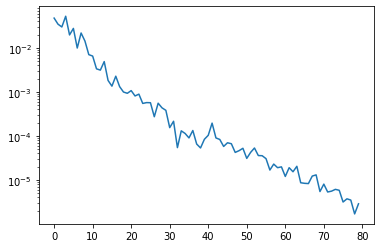

In [408]:
plt.semilogy(Rc.diagonal())

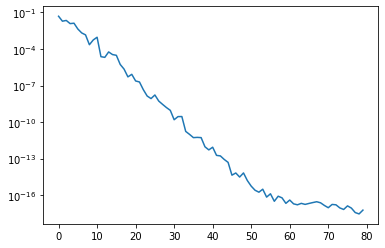

In [409]:
plt.semilogy(Rm.diagonal())

수정 그람 슈미츠가 좀 더 stable하다.

In [410]:
A = np.array([[.70000, .70711], [.70001, .70711]])
Qm, Rm = mgs(A)
V, R = qrhouse(A)
Q = formQ(A)

[[0.5        0.20710887]]


In [412]:
np.linalg.norm(np.dot(Q, Q-np.eye(2)))

2.0

In [413]:
np.linalg.norm(np.dot(Qm, Qm-np.eye(2)))

2.82842712474619

## 3.3

In [342]:
def givensrotation(a,b) : 
    theta = np.arctan(np.array(b/a))
    c = np.cos(theta)
    s = np.sin(theta)
    return c,s

In [345]:
def givens(A) : 
    m,n = np.shape(A)
    Q = np.eye(m)
    R = A
    
    for j in range(n) : 
        for i in range(m-1, j, -1) :
            G = np.eye(m)
            c,s = givensrotation(R[i-1, j], R[i,j])
            G[i-1,i-1] = c
            G[i-1, i] = s
            G[i, i-1] = -s
            G[i,i]=c
            R = np.dot(G,R)
            Q = np.dot(Q,G)
    return Q, R

In [346]:
A = np.array([[0.16953998, 0.98318927, 0.32462592, 0.35857377, 0.84126032],
       [0.91561337, 0.22017678, 0.19810523, 0.60520673, 0.87681935],
       [0.5450577 , 0.50916193, 0.49252225, 0.86752089, 0.67076086],
       [0.2262415 , 0.6247903 , 0.80954266, 0.50085265, 0.81108121],
       [0.20001283, 0.94617092, 0.72162432, 0.54724739, 0.18981353]])
Q,R=givens(A)

In [347]:
R

array([[ 1.12043290e+00,  8.71457039e-01,  7.42895160e-01,
         1.16967920e+00,  1.36779589e+00],
       [-7.72469357e-18, -1.34184566e+00, -8.60556199e-01,
        -5.50658886e-01, -6.37983680e-01],
       [-4.08221015e-17, -5.69103121e-17,  5.20438876e-01,
         2.32720854e-01,  1.07432306e-02],
       [ 4.85872766e-17,  9.34785418e-18,  9.70803237e-19,
         2.68779252e-01, -1.09297518e-01],
       [ 5.37198532e-17,  2.48725035e-17, -4.21152026e-17,
         1.56449810e-17,  5.74789527e-01]])

In [195]:
np.linalg.qr(A)

(array([[-0.1513165 ,  0.63444215,  0.64130393, -0.06895769, -0.39819667],
        [-0.81719607, -0.36664015,  0.17960097, -0.39794727,  0.08454017],
        [-0.48647063,  0.06351228, -0.14693308,  0.85325902, -0.09834747],
        [-0.20192329,  0.33448171, -0.71419438, -0.31894602, -0.4853337 ],
        [-0.17851388,  0.58919126, -0.15751134, -0.08429283,  0.76750983]]),
 array([[-1.1204329 , -0.87145704, -0.74289516, -1.1696792 , -1.36779589],
        [ 0.        ,  1.34184566,  0.8605562 ,  0.55065889,  0.63798368],
        [ 0.        ,  0.        , -0.52043888, -0.23272085, -0.01074323],
        [ 0.        ,  0.        ,  0.        ,  0.26877925, -0.10929752],
        [ 0.        ,  0.        ,  0.        ,  0.        , -0.57478953]]))

In [200]:
def GivensQR(A):
  m,n = np.shape(A)
  R= A
  Q = np.eye(m)
  
  def givens(a,b):
    theta = math.atan(R[a,b]/R[0,b])
    G = np.eye(m)
    G[a,a] = math.cos(theta)
    G[b,b] = math.cos(theta)
    G[a,b] = -math.sin(theta)
    G[b,a] = math.sin(theta)
    return G

  for j in range(0,n):
    for i in range(m-1,j,-1):
      G = givens(i,j)
      R = np.dot(G,R)
      Q = np.dot(G,Q)
      

  return Q.T, R

In [202]:
A = np.array([[0.16953998, 0.98318927, 0.32462592, 0.35857377, 0.84126032],
       [0.91561337, 0.22017678, 0.19810523, 0.60520673, 0.87681935],
       [0.5450577 , 0.50916193, 0.49252225, 0.86752089, 0.67076086],
       [0.2262415 , 0.6247903 , 0.80954266, 0.50085265, 0.81108121],
       [0.20001283, 0.94617092, 0.72162432, 0.54724739, 0.18981353]])
GivensQR(A)

(array([[ 0.1513165 ,  0.36932534, -0.19089154, -0.53002098, -0.72342262],
        [ 0.81719607,  0.34981255,  0.30470552,  0.34149444,  0.01891697],
        [ 0.48647063, -0.81170055, -0.01709696, -0.31303288, -0.0787823 ],
        [ 0.20192329,  0.00946607, -0.9218204 ,  0.32679581,  0.05088238],
        [ 0.17851388,  0.2868494 , -0.14376996, -0.63061416,  0.68374424]]),
 array([[ 1.12043290e+00,  8.71457039e-01,  7.42895160e-01,
          1.16967920e+00,  1.36779589e+00],
        [-5.68537476e-17,  3.04173158e-01,  4.07237862e-03,
         -1.98309208e-01,  1.35089855e-01],
        [ 6.38426148e-17, -8.41273961e-01, -8.60026063e-01,
         -4.39244769e-01, -6.79846449e-01],
        [ 6.49321639e-17, -9.97796149e-01, -4.49093737e-01,
         -4.36364854e-01, -2.11068047e-01],
        [ 8.24356235e-18, -6.84794920e-02,  2.64701713e-01,
          8.33648371e-02, -4.73790415e-01]]))

## 4.3

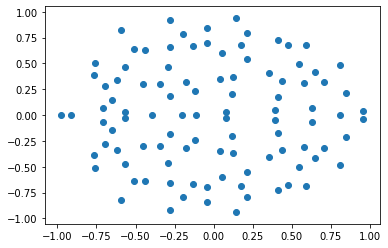

In [383]:
A = np.random.randn(100,100)/(100**0.5)
eigvals = np.linalg.eigvals(A)
plt.scatter(np.real(eigvals),np.imag(eigvals))

=> 반지름이 1인 원 내부에 점이 찍힌다.

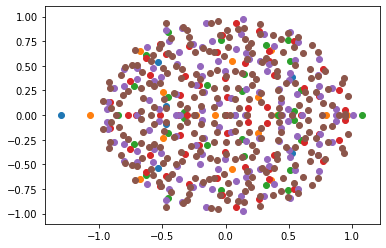

In [382]:
for m in [8,16,32,64,128,256]:
    A = np.random.randn(m,m)/(m**0.5)
    eigvals = np.linalg.eigvals(A)
    plt.scatter(np.real(eigvals),np.imag(eigvals))

m이 커질수록 원의 형태를 보인다.

In [387]:
def spectral_test(n) : 
    spectral=[]
    for m in range(1,n) :
        A = np.random.randn(m,m)/(m**0.5)
        eigvals = np.linalg.eigvals(A)
        spectral.append(np.max(np.abs(eigvals)))
    x = [k for k in range(1,n)]
    plt.plot(x, spectral)
    
    

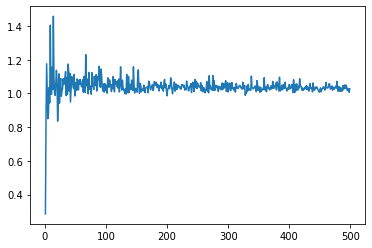

In [390]:
spectral_test(500)

m이 커질수록 1에 수렴하는 형태를 보인다. 

### b

In [385]:
def norm_spectral_test(n) : 
    y_list = []
    for m in range(1,n):
        A = np.random.randn(m,m)/(m**0.5)
        norm2 = np.linalg.norm(A,ord=2)
        spectral = np.max(np.linalg.eigvals(A))
        y_list.append(norm2-spectral)
    x = [k for k in range(1,n)]
    plt.plot(x, y_list)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


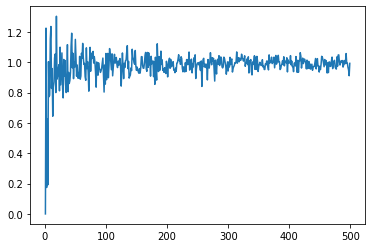

In [386]:
norm_spectral_test(500)

## 4.6